In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [59]:
# Find the most recent date in the data set.
recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent




('2017-08-23',)

            date  prcp
0     2016-08-24  0.08
1     2016-08-25  0.08
2     2016-08-26  0.00
3     2016-08-27  0.00
4     2016-08-28  0.01
...          ...   ...
2218  2017-08-19  0.09
2219  2017-08-20   NaN
2220  2017-08-21  0.56
2221  2017-08-22  0.50
2222  2017-08-23  0.45

[2223 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

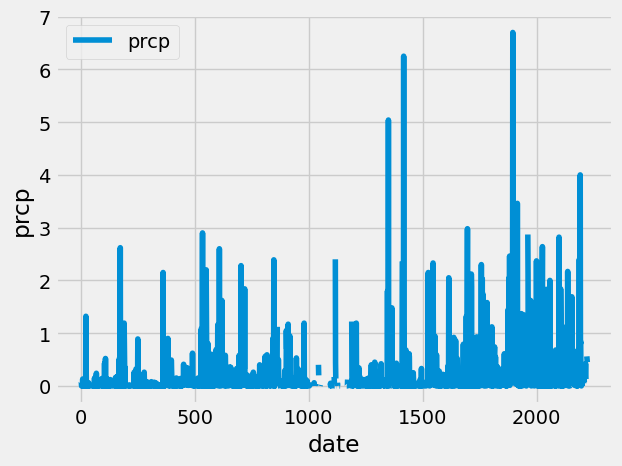

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
last12 = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-24').filter(measurement.date <= '2017-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
last12df = pd.DataFrame(last12, columns=['date', 'prcp'])

# Sort the dataframe by date
last12df.set_index('date')
last12df.sort_values(by=['date'])

print(last12df)

# Use Pandas Plotting with Matplotlib to plot the data
last12df.plot(x_compat=True)
plt.xlabel('date')
plt.ylabel('prcp')

plt.show

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
last12df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

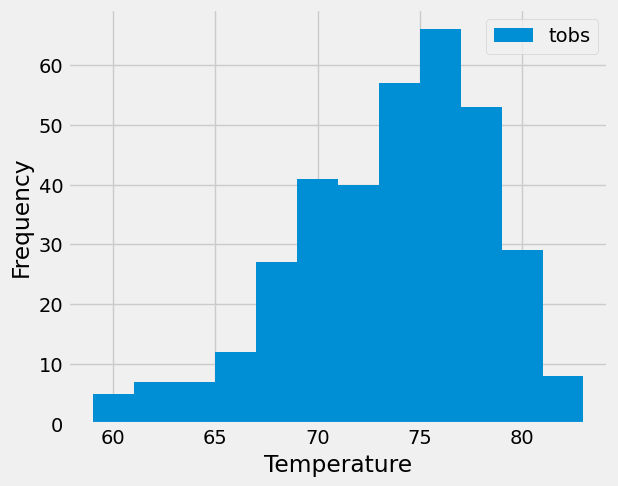

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()